In [ ]:
from bokeh.plotting import figure, output_notebook, output_file
import matplotlib.pyplot as plt
import numpy as np

## Fundamental Equation

x(n+1) = r * x(n) * (1-x(n))

## Helper Functions
This is where some fundamental functions are setup for the rest of the iterations, such as:
1. Defining the equation to iterate

In [124]:
def logistic_eq(r, xn):
    return r*xn*(1-xn)


def run_generation(r,i,n):
    # i defines the initial iterations
    # n is for what range to find discrete points
    x = 0.01
    for _ in range(i):
        x = logistic_eq(r,x)
    
    pts = np.array([])
    for _ in range(n):
        x = logistic_eq(r,x)
        pts = np.append(pts, np.array([x]))
    
    return pts

In [137]:
num_base_iters = 1000
num_final_iters = 100

r_start = 0.5
r_stop = 4.0
r_step = 0.001
r_list = np.arange(r_start, r_stop, r_step)

data = np.array([])

for r in r_list:
    result = run_generation(r, num_base_iters, num_final_iters)
    data = np.append(data, result)
    
r_array = np.array([r_list]*num_final_iters).transpose()
r_array = np.squeeze(np.reshape(r_array, (1, r_array.size)))


In [135]:
p = figure(plot_width=1000, plot_height=1000)

p.circle(r_array, data, size=2, color="navy", alpha=0.075)

output_file("LogisticMap.html", title="LogisticMapVis")

<IPython.core.display.Javascript object>


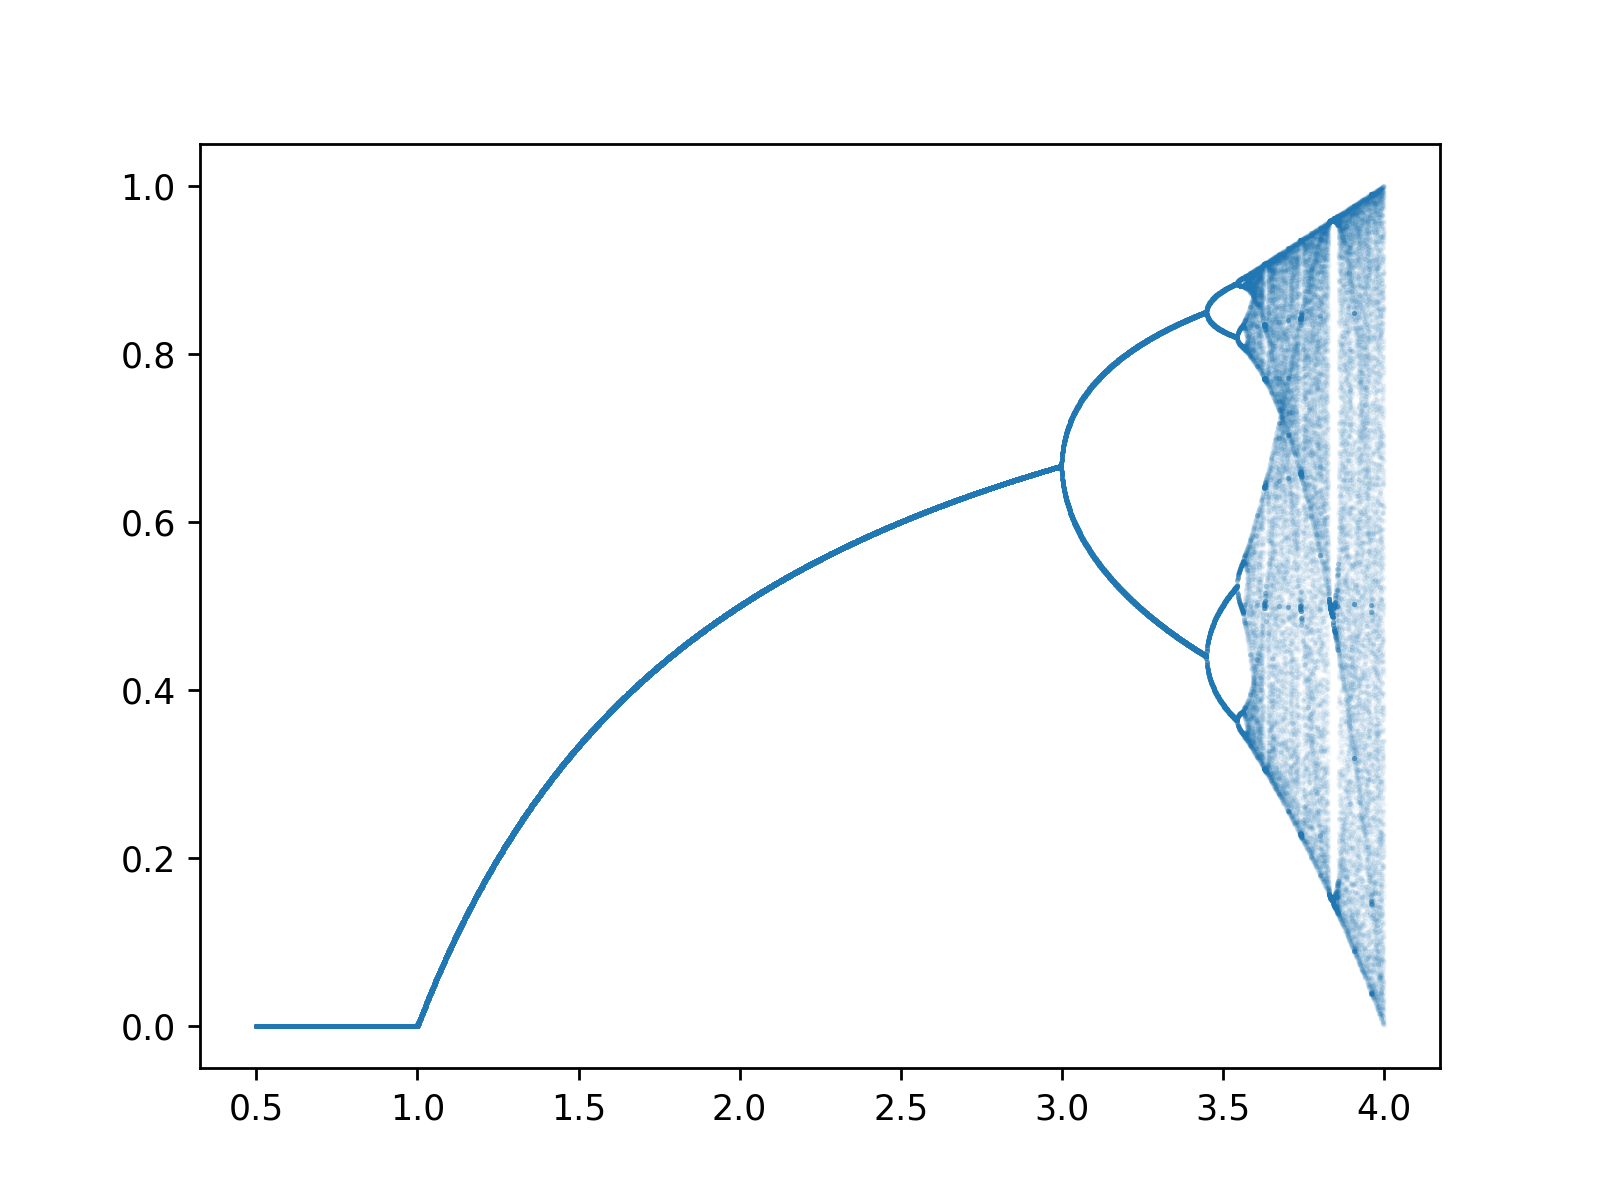

In [144]:
%matplotlib notebook
plt.scatter(r_array, data, alpha=0.05, s=0.2)